In [ ]:
!pip install Sastrawi tweet-preprocessor textblob wordcloud nltk
!pip install emoji
!pip install Sastrawi nltk
!pip install translate nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 1.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/Prabowo_Ready to Preprocessing (2) (4) Epoch 2.xlsx')
df.head()

,Publish Date,User Name,Cleaned Comment Text,Comment Text,Cleaned Comment Text (EN),Comment Text (EN)
0,"4/24/2024, 7:27:46 PM",ayib_arshavin,alhamdulillah pak,Alhamdulillah pak,thank God sir,Thank God sir
1,"4/24/2024, 7:27:46 PM",dayanaadrn,banyak selamattt,banyak selamattt 🫶🏻💙🫶🏻,lots of congratulations,many congratulations 🫶🏻💙🫶🏻
2,"4/24/2024, 7:27:46 PM",hendrajuniawan.5,penantian 15 tahun ku tunggu ternyata bpak h p...,penantian 15 tahun ku tunggu ternyata bpak h p...,I've been waiting 15 years but it turns out Mr...,I've been waiting 15 years but it turns out Mr...
3,"4/24/2024, 7:27:46 PM",photography_epw,pak wowo masih bisa baik loh sama abah pdhl ud...,Pak wowo masih bisa baik loh sama abah pdhl ud...,Mr. Wowo can still be nice to you even though ...,Mr Wowo can still be nice to you even though h...
4,"4/24/2024, 7:27:28 PM",prameliandari,selamat bapak,Selamat bapak.. 🔥🔥🔥 ❤️🤍,congratulations sir,Congratulations sir.. 🔥🔥🔥 ❤️🤍


In [ ]:
# df = df.head(20000)

In [ ]:
df.columns

Index(['Publish Date', 'User Name', 'Cleaned Comment Text', 'Comment Text',
       'Cleaned Comment Text (EN)', 'Comment Text (EN)'],
      dtype='object')

In [ ]:
df = df[['User Name','Cleaned Comment Text', 'Comment Text',
       'Cleaned Comment Text (EN)', 'Comment Text (EN)']]
df.head()

,User Name,Cleaned Comment Text,Comment Text,Cleaned Comment Text (EN),Comment Text (EN)
0,ayib_arshavin,alhamdulillah pak,Alhamdulillah pak,thank God sir,Thank God sir
1,dayanaadrn,banyak selamattt,banyak selamattt 🫶🏻💙🫶🏻,lots of congratulations,many congratulations 🫶🏻💙🫶🏻
2,hendrajuniawan.5,penantian 15 tahun ku tunggu ternyata bpak h p...,penantian 15 tahun ku tunggu ternyata bpak h p...,I've been waiting 15 years but it turns out Mr...,I've been waiting 15 years but it turns out Mr...
3,photography_epw,pak wowo masih bisa baik loh sama abah pdhl ud...,Pak wowo masih bisa baik loh sama abah pdhl ud...,Mr. Wowo can still be nice to you even though ...,Mr Wowo can still be nice to you even though h...
4,prameliandari,selamat bapak,Selamat bapak.. 🔥🔥🔥 ❤️🤍,congratulations sir,Congratulations sir.. 🔥🔥🔥 ❤️🤍


In [ ]:
df["Cleaned (EN)"] = df["Comment Text (EN)"].str.lower()
df.head()

,User Name,Cleaned Comment Text,Comment Text,Cleaned Comment Text (EN),Comment Text (EN),Cleaned (EN)
0,ayib_arshavin,alhamdulillah pak,Alhamdulillah pak,thank God sir,Thank God sir,thank god sir
1,dayanaadrn,banyak selamattt,banyak selamattt 🫶🏻💙🫶🏻,lots of congratulations,many congratulations 🫶🏻💙🫶🏻,many congratulations 🫶🏻💙🫶🏻
2,hendrajuniawan.5,penantian 15 tahun ku tunggu ternyata bpak h p...,penantian 15 tahun ku tunggu ternyata bpak h p...,I've been waiting 15 years but it turns out Mr...,I've been waiting 15 years but it turns out Mr...,i've been waiting 15 years but it turns out mr...
3,photography_epw,pak wowo masih bisa baik loh sama abah pdhl ud...,Pak wowo masih bisa baik loh sama abah pdhl ud...,Mr. Wowo can still be nice to you even though ...,Mr Wowo can still be nice to you even though h...,mr wowo can still be nice to you even though h...
4,prameliandari,selamat bapak,Selamat bapak.. 🔥🔥🔥 ❤️🤍,congratulations sir,Congratulations sir.. 🔥🔥🔥 ❤️🤍,congratulations sir.. 🔥🔥🔥 ❤️🤍


In [ ]:
df = df.copy()
df100 = df
df100.head()

,User Name,Cleaned Comment Text,Comment Text,Cleaned Comment Text (EN),Comment Text (EN),Cleaned (EN)
0,ayib_arshavin,alhamdulillah pak,Alhamdulillah pak,thank God sir,Thank God sir,thank god sir
1,dayanaadrn,banyak selamattt,banyak selamattt 🫶🏻💙🫶🏻,lots of congratulations,many congratulations 🫶🏻💙🫶🏻,many congratulations 🫶🏻💙🫶🏻
2,hendrajuniawan.5,penantian 15 tahun ku tunggu ternyata bpak h p...,penantian 15 tahun ku tunggu ternyata bpak h p...,I've been waiting 15 years but it turns out Mr...,I've been waiting 15 years but it turns out Mr...,i've been waiting 15 years but it turns out mr...
3,photography_epw,pak wowo masih bisa baik loh sama abah pdhl ud...,Pak wowo masih bisa baik loh sama abah pdhl ud...,Mr. Wowo can still be nice to you even though ...,Mr Wowo can still be nice to you even though h...,mr wowo can still be nice to you even though h...
4,prameliandari,selamat bapak,Selamat bapak.. 🔥🔥🔥 ❤️🤍,congratulations sir,Congratulations sir.. 🔥🔥🔥 ❤️🤍,congratulations sir.. 🔥🔥🔥 ❤️🤍


In [ ]:
df100.shape

(12956, 6)

In [ ]:
import string

# Define a function to remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df100['Cleaned (EN)'] = df100['Cleaned (EN)'].apply(remove_punctuation)

In [ ]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already installed
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

df100['Cleaned (EN)'] = df100['Cleaned (EN)'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from collections import Counter

# Identify the most common words
word_counts = Counter(" ".join(df['Cleaned (EN)']).split())
frequent_words = set([word for word, count in word_counts.most_common(10)])  # Adjust the number as needed

# Function to remove frequent words
def remove_frequent_words(text):
    return ' '.join([word for word in text.split() if word not in frequent_words])

df100['Cleaned (EN)'] = df100['Cleaned (EN)'].apply(remove_frequent_words)

In [ ]:
# Identify rare words
rare_words = set([word for word, count in word_counts.items() if count == 1])  # Adjust threshold as needed

# Function to remove rare words
def remove_rare_words(text):
    return ' '.join([word for word in text.split() if word not in rare_words])

df100['Cleaned (EN)'] = df100['Cleaned (EN)'].apply(remove_rare_words)

In [ ]:
from nltk.stem import PorterStemmer

# Initialize the stemmer
stemmer = PorterStemmer()

# Function to stem words
def stemming(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

df100['Cleaned (EN)'] = df100['Cleaned (EN)'].apply(stemming)

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

# Function to lemmatize words
def lemmatize(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

df100['Cleaned (EN)'] = df100['Cleaned (EN)'].apply(lemmatize)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
!pip install emoji

In [ ]:
import emoji

# Function to remove emojis
def remove_emojis(text):
    return emoji.replace_emoji(text, replace='')  # Replace emojis with an empty string

df100['Cleaned (EN)'] = df100['Comment Text (EN)'].apply(remove_emojis) # OR

In [ ]:
'''
# Function to convert emojis to words
def convert_emojis_to_words(text):
    return emoji.demojize(text)

df100['Cleaned (EN)'] = df100['Comment Text (EN)'].apply(convert_emojis_to_words)
'''

"\n# Function to convert emojis to words\ndef convert_emojis_to_words(text):\n    return emoji.demojize(text)\n\ndf100['Cleaned (EN)'] = df100['Comment Text (EN)'].apply(convert_emojis_to_words)\n"

In [ ]:
# Function to remove URLs
def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

df100['Cleaned (EN)'] = df100['Cleaned (EN)'].apply(remove_urls)

In [ ]:
from bs4 import BeautifulSoup

# Function to remove HTML tags
def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text()

df100['Cleaned (EN)'] = df100['Cleaned (EN)'].apply(remove_html_tags)

<ipython-input-19-632c249c482b>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


In [ ]:
'''chat_words = {'u': 'you', 'r': 'are', 'lol': 'laughing out loud', 'omg': 'oh my god'}  # Expand as needed

# Function to convert chat words
def convert_chat_words(text):
    return ' '.join([chat_words[word] if word in chat_words else word for word in text.split()])

df['Cleaned (EN)'] = df['Cleaned (EN)'].apply(convert_chat_words)'''

"chat_words = {'u': 'you', 'r': 'are', 'lol': 'laughing out loud', 'omg': 'oh my god'}  # Expand as needed\n\n# Function to convert chat words\ndef convert_chat_words(text):\n    return ' '.join([chat_words[word] if word in chat_words else word for word in text.split()])\n\ndf['Cleaned (EN)'] = df['Cleaned (EN)'].apply(convert_chat_words)"

In [ ]:
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 40.2 MB/s eta 0:00:00


In [ ]:
!pip install tqdm

In [ ]:
from tqdm import tqdm
from spellchecker import SpellChecker

# Initialize SpellChecker
spell = SpellChecker()

# Function for spell correction with progress bar
def correct_spelling_with_progress(df_column):
    corrected_texts = []
    # Use tqdm to wrap the iterable and display progress
    for text in tqdm(df_column, desc="Processing"):
        corrected_text = []
        for word in text.split():
            corrected_word = spell.correction(word)
            corrected_text.append(corrected_word if corrected_word is not None else word)
        corrected_texts.append(' '.join(corrected_text))
    return corrected_texts

# Apply the function with progress bar to the dataframe column
df100['Cleaned (EN)'] = correct_spelling_with_progress(df100['Cleaned (EN)'])

Processing: 100%|██████████| 12956/12956 [2:40:36<00:00,  1.34it/s]


In [ ]:
# !pip install textblob

In [ ]:
'''from textblob import TextBlob

# Function for spelling correction
def correct_spelling(text):
    return str(TextBlob(text).correct())

df['Cleaned (EN)'] = df['Cleaned (EN)'].apply(correct_spelling)'''

"from textblob import TextBlob\n\n# Function for spelling correction\ndef correct_spelling(text):\n    return str(TextBlob(text).correct())\n\ndf['Cleaned (EN)'] = df['Cleaned (EN)'].apply(correct_spelling)"

In [ ]:
import re

def symbol_text(text):
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Extract words from hashtags
    text = re.sub(r'#(\w+)', r'\1', text)
    # Remove all punctuation except for exclamation and question marks
    text = re.sub(r'[^\w\s!?]', '', text)
    return text

df100['Cleaned (EN)'] = df100['Cleaned (EN)'].apply(symbol_text)

In [ ]:
df100[['Comment Text (EN)', 'Cleaned (EN)']]

,Comment Text (EN),Cleaned (EN)
0,Thank God sir,Thank God sir
1,many congratulations 🫶🏻💙🫶🏻,many congratulations
2,I've been waiting 15 years but it turns out Mr...,have been waiting 15 years but it turns out my...
3,Mr Wowo can still be nice to you even though h...,my wow can still be nice to you even though he...
4,Congratulations sir.. 🔥🔥🔥 ❤️🤍,Congratulations sir
...,...,...
12951,Prabowo presidential button🔥🔥🔥🔥,Prabowo presidential button
12952,"Thank you sir, I hope your position in educati...",Thank you sir I hope your position in educatio...
12953,Thank God ❤️,Thank God
12954,Gassspolll sir 🔥🔥🔥,Gassspolll sir


In [ ]:
!pip install textblob vaderSentiment transformers torch --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline

In [ ]:
# Function to label sentiment using TextBlob
def get_sentiment_textblob(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply to the dataset
df100['TextBlob_Sentiment'] = df100['Cleaned (EN)'].apply(get_sentiment_textblob)

In [ ]:
# Initialize VADER sentiment analyzer
vader_analyzer = SentimentIntensityAnalyzer()

# Function to label sentiment using VADER
def get_sentiment_vader(text):
    compound = vader_analyzer.polarity_scores(text)['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply to the dataset
df100['VADER_Sentiment'] = df100['Cleaned (EN)'].apply(get_sentiment_vader)

In [ ]:
# Load the sentiment analysis pipeline from transformers (DistilBERT)
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Function to get sentiment using DistilBERT
def get_sentiment_transformer(text):
    result = classifier(text)[0]
    return result['label'].lower()  # returns 'positive' or 'negative'

# Apply to the dataset
df100['Transformers_Sentiment'] = df100['Cleaned (EN)'].apply(get_sentiment_transformer)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
df100[['Comment Text','Cleaned (EN)', 'TextBlob_Sentiment', 'VADER_Sentiment', 'Transformers_Sentiment']]

,Comment Text,Cleaned (EN),TextBlob_Sentiment,VADER_Sentiment,Transformers_Sentiment
0,Alhamdulillah pak,Thank God sir,neutral,positive,positive
1,banyak selamattt 🫶🏻💙🫶🏻,many congratulations,positive,positive,positive
2,penantian 15 tahun ku tunggu ternyata bpak h p...,have been waiting 15 years but it turns out my...,neutral,neutral,positive
3,Pak wowo masih bisa baik loh sama abah pdhl ud...,my wow can still be nice to you even though he...,positive,positive,positive
4,Selamat bapak.. 🔥🔥🔥 ❤️🤍,Congratulations sir,neutral,positive,positive
...,...,...,...,...,...
12951,Tombol Prabowo presiden🔥🔥🔥🔥,Prabowo presidential button,neutral,neutral,negative
12952,"Terimakasih Pak, Semoga Bapak Menjabat Pendidi...",Thank you sir I hope your position in educatio...,neutral,positive,positive
12953,Alhamdulillah ❤️,Thank God,neutral,positive,positive
12954,Gassspollll Pak 🔥🔥🔥,Gassspolll sir,neutral,neutral,positive


In [ ]:
df100.to_excel("EN 100 Dataset Train Prabowo.xlsx", index=False)

PERTIMBANGAN TERAKHIR UNTUK LABELING AKAN MENGGUNAKAN VADER KARENA

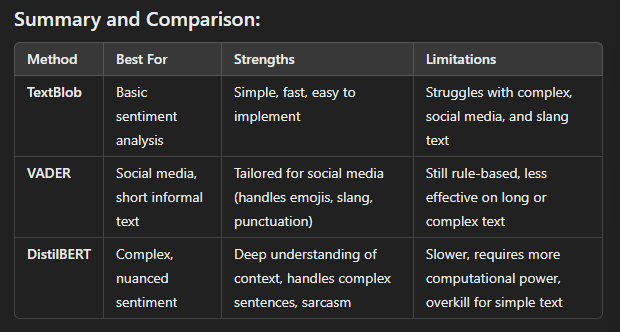

# Evaluasi


### Evaluating with auto labels from TextBlob_Sentiment ###

Model: Naive Bayes
              precision    recall  f1-score   support

    negative       0.44      0.47      0.45        64
     neutral       0.95      0.88      0.92       765
    positive       0.84      0.93      0.89       467

    accuracy                           0.88      1296
   macro avg       0.74      0.76      0.75      1296
weighted avg       0.89      0.88      0.88      1296


Model: SVM
              precision    recall  f1-score   support

    negative       0.79      0.70      0.74        64
     neutral       0.98      0.99      0.99       765
    positive       0.97      0.96      0.97       467

    accuracy                           0.97      1296
   macro avg       0.91      0.89      0.90      1296
weighted avg       0.97      0.97      0.97      1296


Model: KNN
              precision    recall  f1-score   support

    negative       0.63      0.34      0.44        64
     neutral       0.81 

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


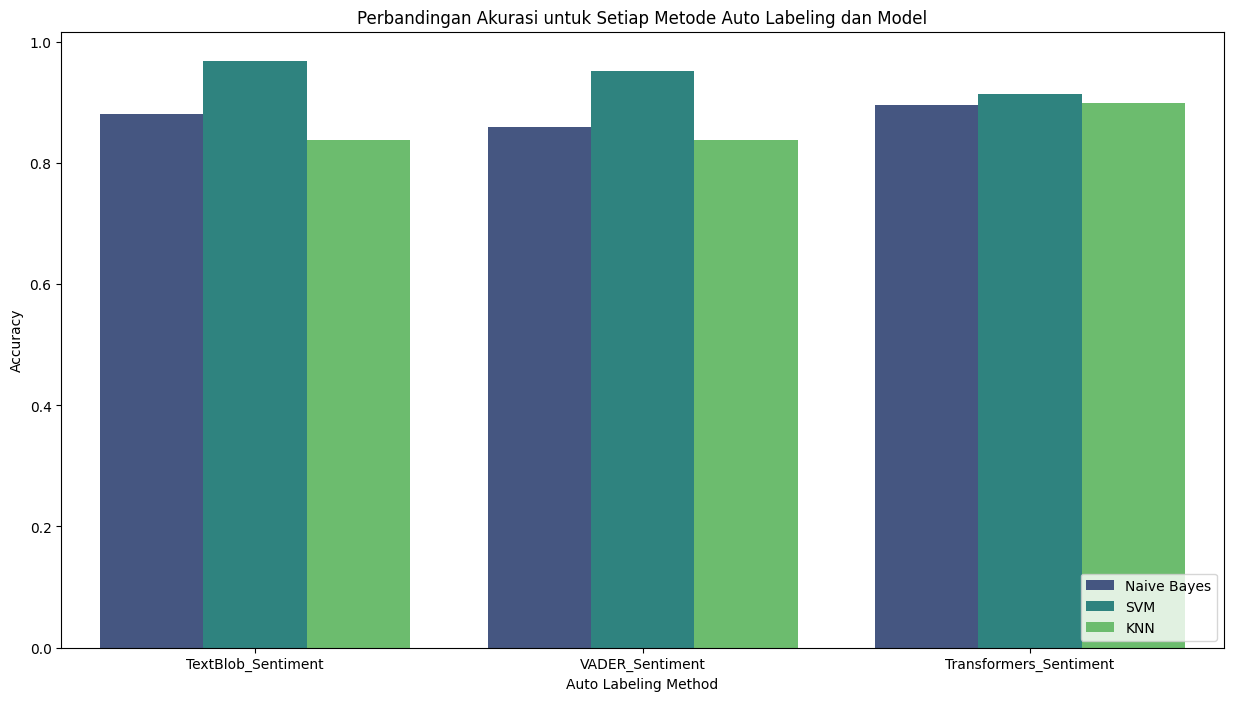

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


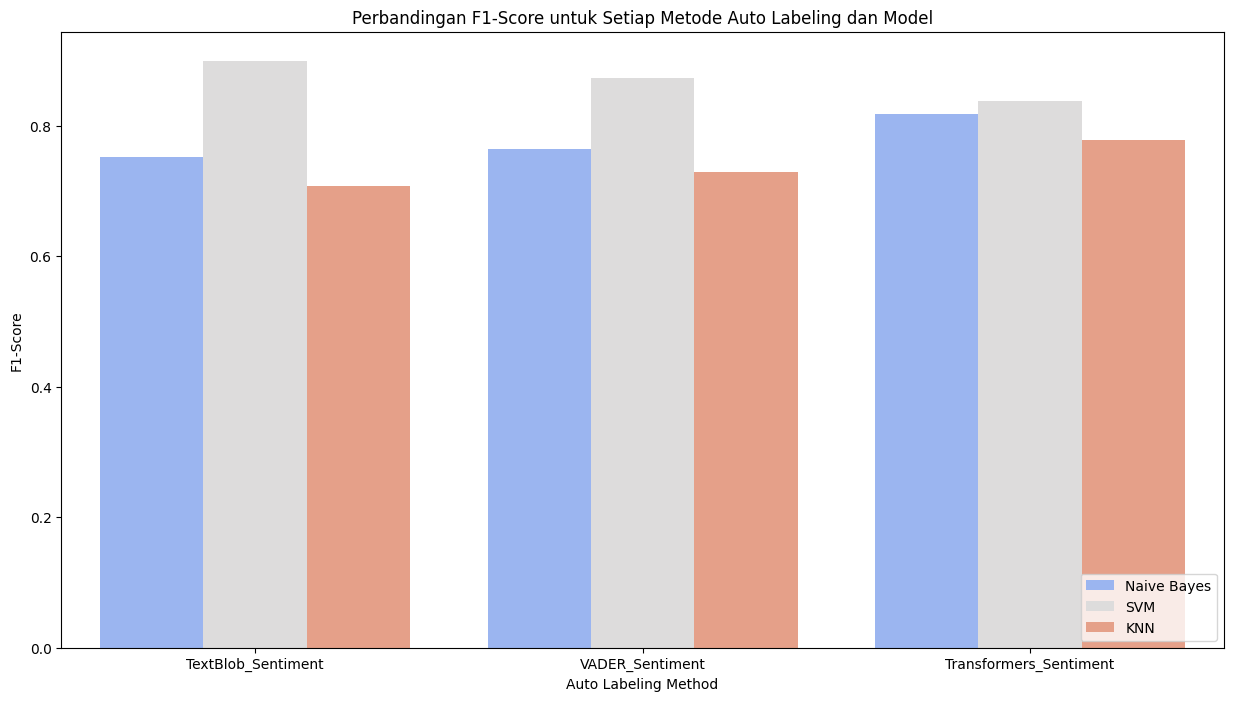

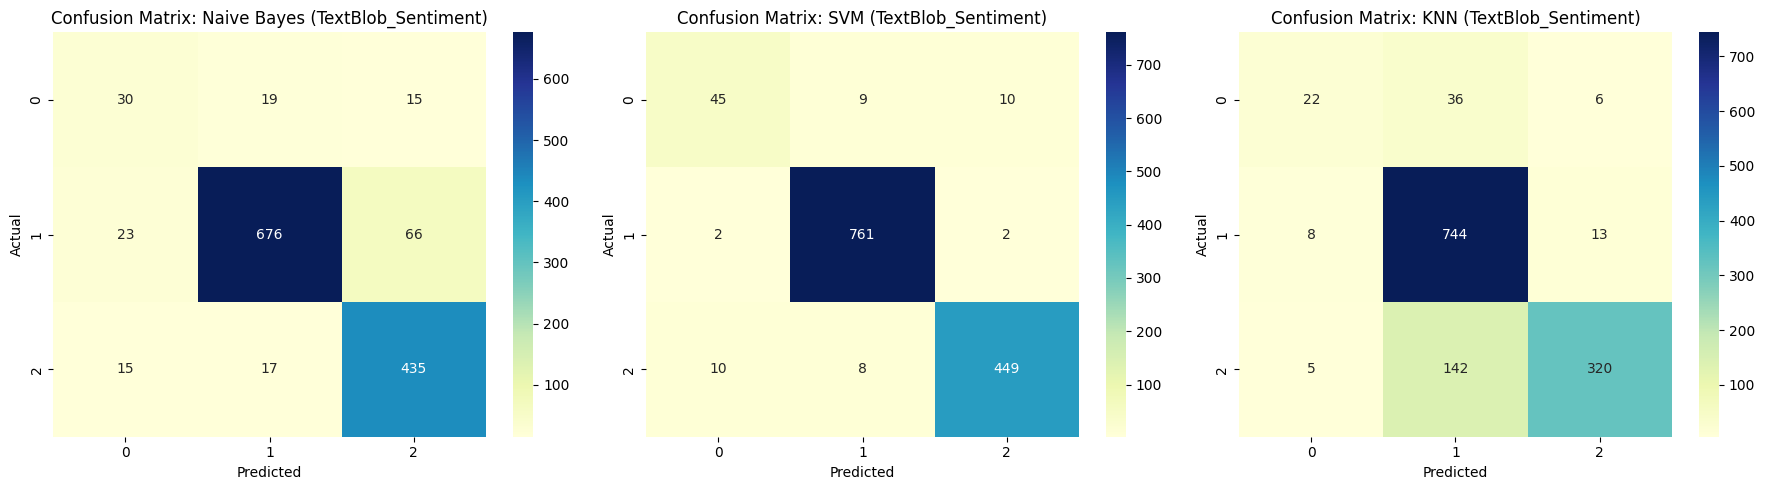

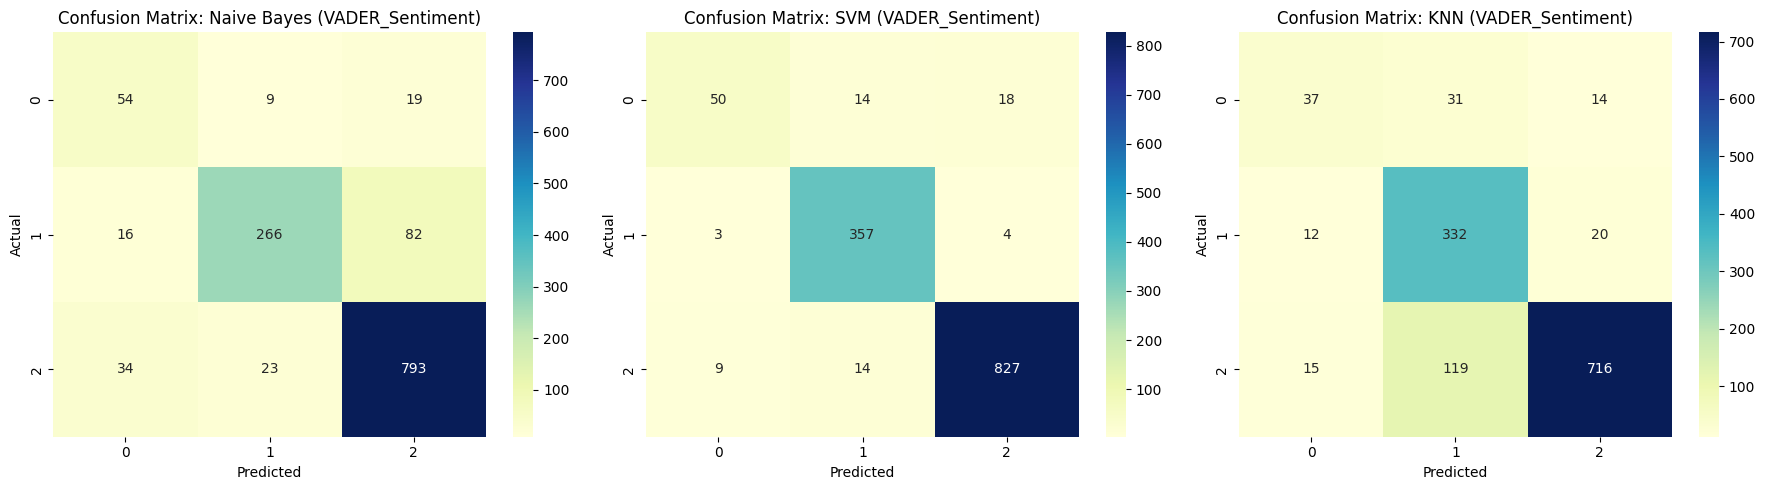

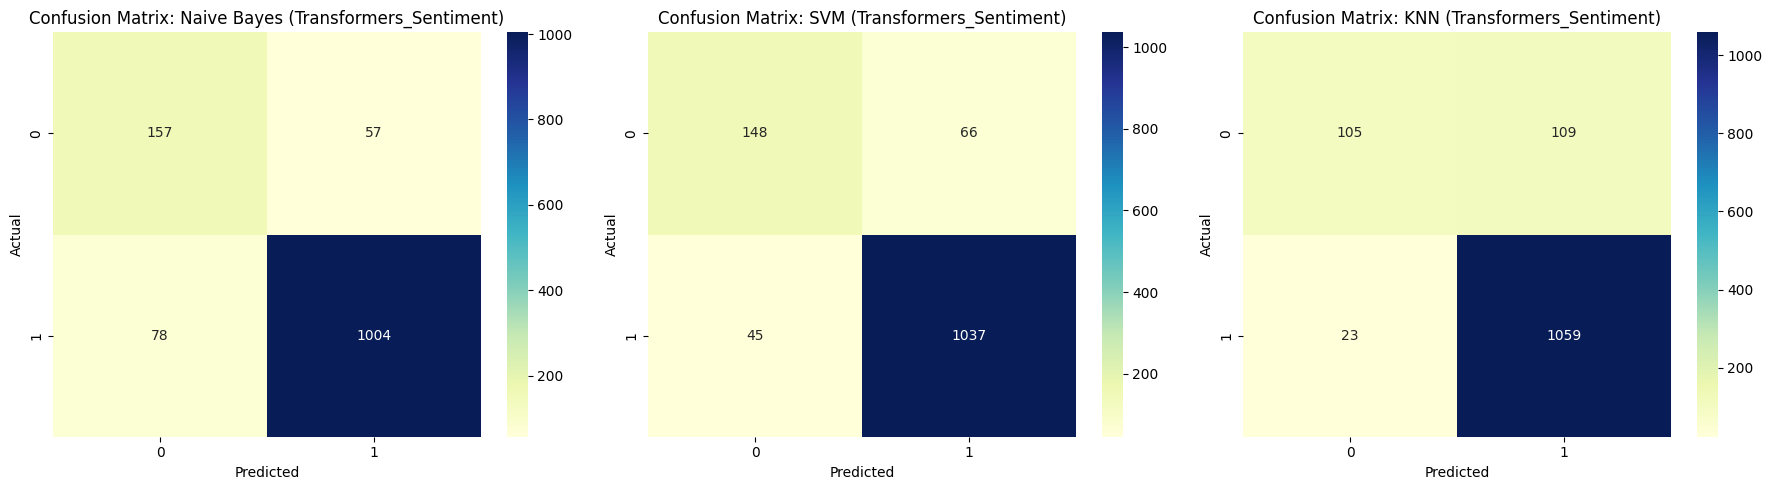

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Fungsi umum untuk training dan evaluasi model
def train_and_evaluate(X_train, X_test, y_train, y_test, model_name, model):
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Print detailed classification report
    print(f"\nModel: {model_name}")
    print(classification_report(y_test, y_pred))

    # Return results as a dictionary
    return {
        'model': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

# Preprocessing text data with CountVectorizer
vectorizer = CountVectorizer()

# Split dataset based on each auto-labeling method (BERT, TextBlob, VADER)
auto_label_methods = ['TextBlob_Sentiment', 'VADER_Sentiment', 'Transformers_Sentiment']
models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(n_neighbors=3)
}

results = []

for method in auto_label_methods:
    print(f"\n### Evaluating with auto labels from {method} ###")

    # Extract feature vectors from text
    X = df100['Cleaned (EN)']
    X_vect = vectorizer.fit_transform(X)

    # Split data for training and testing
    y = df100[method]
    X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.1, random_state=42)

    for model_name, model in models.items():
        # Train and evaluate the model
        result = train_and_evaluate(X_train, X_test, y_train, y_test, model_name, model)
        result['auto_label_method'] = method
        results.append(result)

# Convert results into DataFrame for better visualization
results_df = pd.DataFrame(results)
results_df.to_excel("EN 80000 Dataset Train Prabowo.xlsx", index=False)

# Step 4: Visualisasi Perbandingan Performa
# Membuat plot untuk perbandingan setiap metode auto-labeling dan model
plt.figure(figsize=(15, 8))
sns.barplot(data=results_df, x='auto_label_method', y='accuracy', hue='model', palette='viridis')
plt.title('Perbandingan Akurasi untuk Setiap Metode Auto Labeling dan Model')
plt.ylabel('Accuracy')
plt.xlabel('Auto Labeling Method')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(15, 8))
sns.barplot(data=results_df, x='auto_label_method', y='f1_score', hue='model', palette='coolwarm')
plt.title('Perbandingan F1-Score untuk Setiap Metode Auto Labeling dan Model')
plt.ylabel('F1-Score')
plt.xlabel('Auto Labeling Method')
plt.legend(loc='lower right')
plt.show()

# Visualisasi Confusion Matrix untuk setiap model dan metode auto labeling
for method in auto_label_methods:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    for i, model_name in enumerate(models.keys()):
        cm = results_df[(results_df['model'] == model_name) & (results_df['auto_label_method'] == method)]['confusion_matrix'].values[0]
        sns.heatmap(cm, annot=True, fmt="d", ax=axes[i], cmap="YlGnBu")
        axes[i].set_title(f'Confusion Matrix: {model_name} ({method})')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

In [ ]:
# Hitung jumlah unique count untuk setiap metode auto-labeling sentiment
vader_counts = df100['VADER_Sentiment'].value_counts()
textblob_counts = df100['TextBlob_Sentiment'].value_counts()
bert_counts = df100['Transformers_Sentiment'].value_counts()

# Tampilkan hasilnya
print("Jumlah Sentimen Unik berdasarkan VADER Sentiment:")
print(vader_counts)

print("\nJumlah Sentimen Unik berdasarkan TextBlob Sentiment:")
print(textblob_counts)

print("\nJumlah Sentimen Unik berdasarkan Transformers (BERT) Sentiment:")
print(bert_counts)

Jumlah Sentimen Unik berdasarkan VADER Sentiment:
VADER_Sentiment
positive    8300
neutral     3826
negative     830
Name: count, dtype: int64

Jumlah Sentimen Unik berdasarkan TextBlob Sentiment:
TextBlob_Sentiment
neutral     7864
positive    4554
negative     538
Name: count, dtype: int64

Jumlah Sentimen Unik berdasarkan Transformers (BERT) Sentiment:
Transformers_Sentiment
positive    10668
negative     2288
Name: count, dtype: int64
